Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#name of the CSV file you want to read
df_train = pd.read_csv("Train.csv")
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
#Load and explore data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None


In [4]:
df_train.shape

(8068, 11)

In [5]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
# check if dataframe has null values:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
df_train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [8]:
#dropping id as it's irrelevant to my task.
df_train.drop("ID", axis=1,inplace=True)
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [9]:
df_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [10]:
#percentage of missing values
missingvaluepercent= (df_train.isnull().sum() / len(df_train)) * 100
missingvaluepercent

Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

In [11]:
# Check the number of duplicate values
df_train.duplicated().sum()

417

In [12]:
df_train = df_train.drop_duplicates()

In [13]:
df_train.duplicated().sum()

0

In [14]:
#handling missing values with mode for categorical feature
df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0], inplace=True)
df_train['Graduated'].fillna(df_train['Graduated'].mode()[0], inplace=True)
df_train['Profession'].fillna(df_train['Profession'].mode()[0], inplace=True)
df_train['Var_1'].fillna(df_train['Var_1'].mode()[0], inplace=True)

C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\1195256956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ever_Married'].fillna(df_train['Ever_Married'].mode()[0], inplace=True)
C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\1195256956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Graduated'].fillna(df_train['Graduated'].mode()[0], inplace=True)
C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\1195256956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [15]:
#handling missing values with median for for numerical variables
df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace = True)
df_train['Family_Size'].fillna(df_train['Family_Size'].median(),inplace = True)

C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\472221205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Work_Experience'].fillna(df_train['Work_Experience'].median(), inplace = True)
C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\472221205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Family_Size'].fillna(df_train['Family_Size'].median(),inplace = True)


In [16]:
# check if dataframe has null values:
df_train.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Data Preprocessing

In [17]:
#changing categorical data into numeric data
def change_gender(gender):
    if gender == 'Male':
        return 1 
    else:
        return 0
df_train['Gender'] = df_train['Gender'].apply(change_gender)

C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\1887474942.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender'] = df_train['Gender'].apply(change_gender)


In [18]:
df_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,0,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,1,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,0,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [19]:
#changing 'Ever_Married' and 'Graduated' into numeric data
categorical_features = ['Ever_Married', 'Graduated']  
for i in categorical_features[0:2]:
    df_train[i] = df_train[i].apply(lambda x: 1 if x=='Yes' else 0)
df_train.head()

C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\4180729111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i] = df_train[i].apply(lambda x: 1 if x=='Yes' else 0)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B
4,0,1,40,1,Entertainment,1.0,High,6.0,Cat_6,A


In [20]:
# Label encoder on Profession feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_train['Profession'])
df_train['Profession'] = y
df_train.head()

C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\884459437.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Profession'] = y


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,Low,4.0,Cat_4,D
1,0,1,38,1,2,1.0,Average,3.0,Cat_4,A
2,0,1,67,1,2,1.0,Low,1.0,Cat_6,B
3,1,1,67,1,7,0.0,High,2.0,Cat_6,B
4,0,1,40,1,3,1.0,High,6.0,Cat_6,A


In [21]:
# label encoder for spending score and Var_1
categorical_features = ['Spending_Score','Var_1']
for i in categorical_features:
    le = LabelEncoder()
    y = le.fit_transform(df_train[i])
    df_train[i] = y
df_train.head()

C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\2393303550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i] = y
C:\Users\ssayj\AppData\Local\Temp\ipykernel_19904\2393303550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i] = y


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,D
1,0,1,38,1,2,1.0,0,3.0,3,A
2,0,1,67,1,2,1.0,2,1.0,5,B
3,1,1,67,1,7,0.0,1,2.0,5,B
4,0,1,40,1,3,1.0,1,6.0,5,A


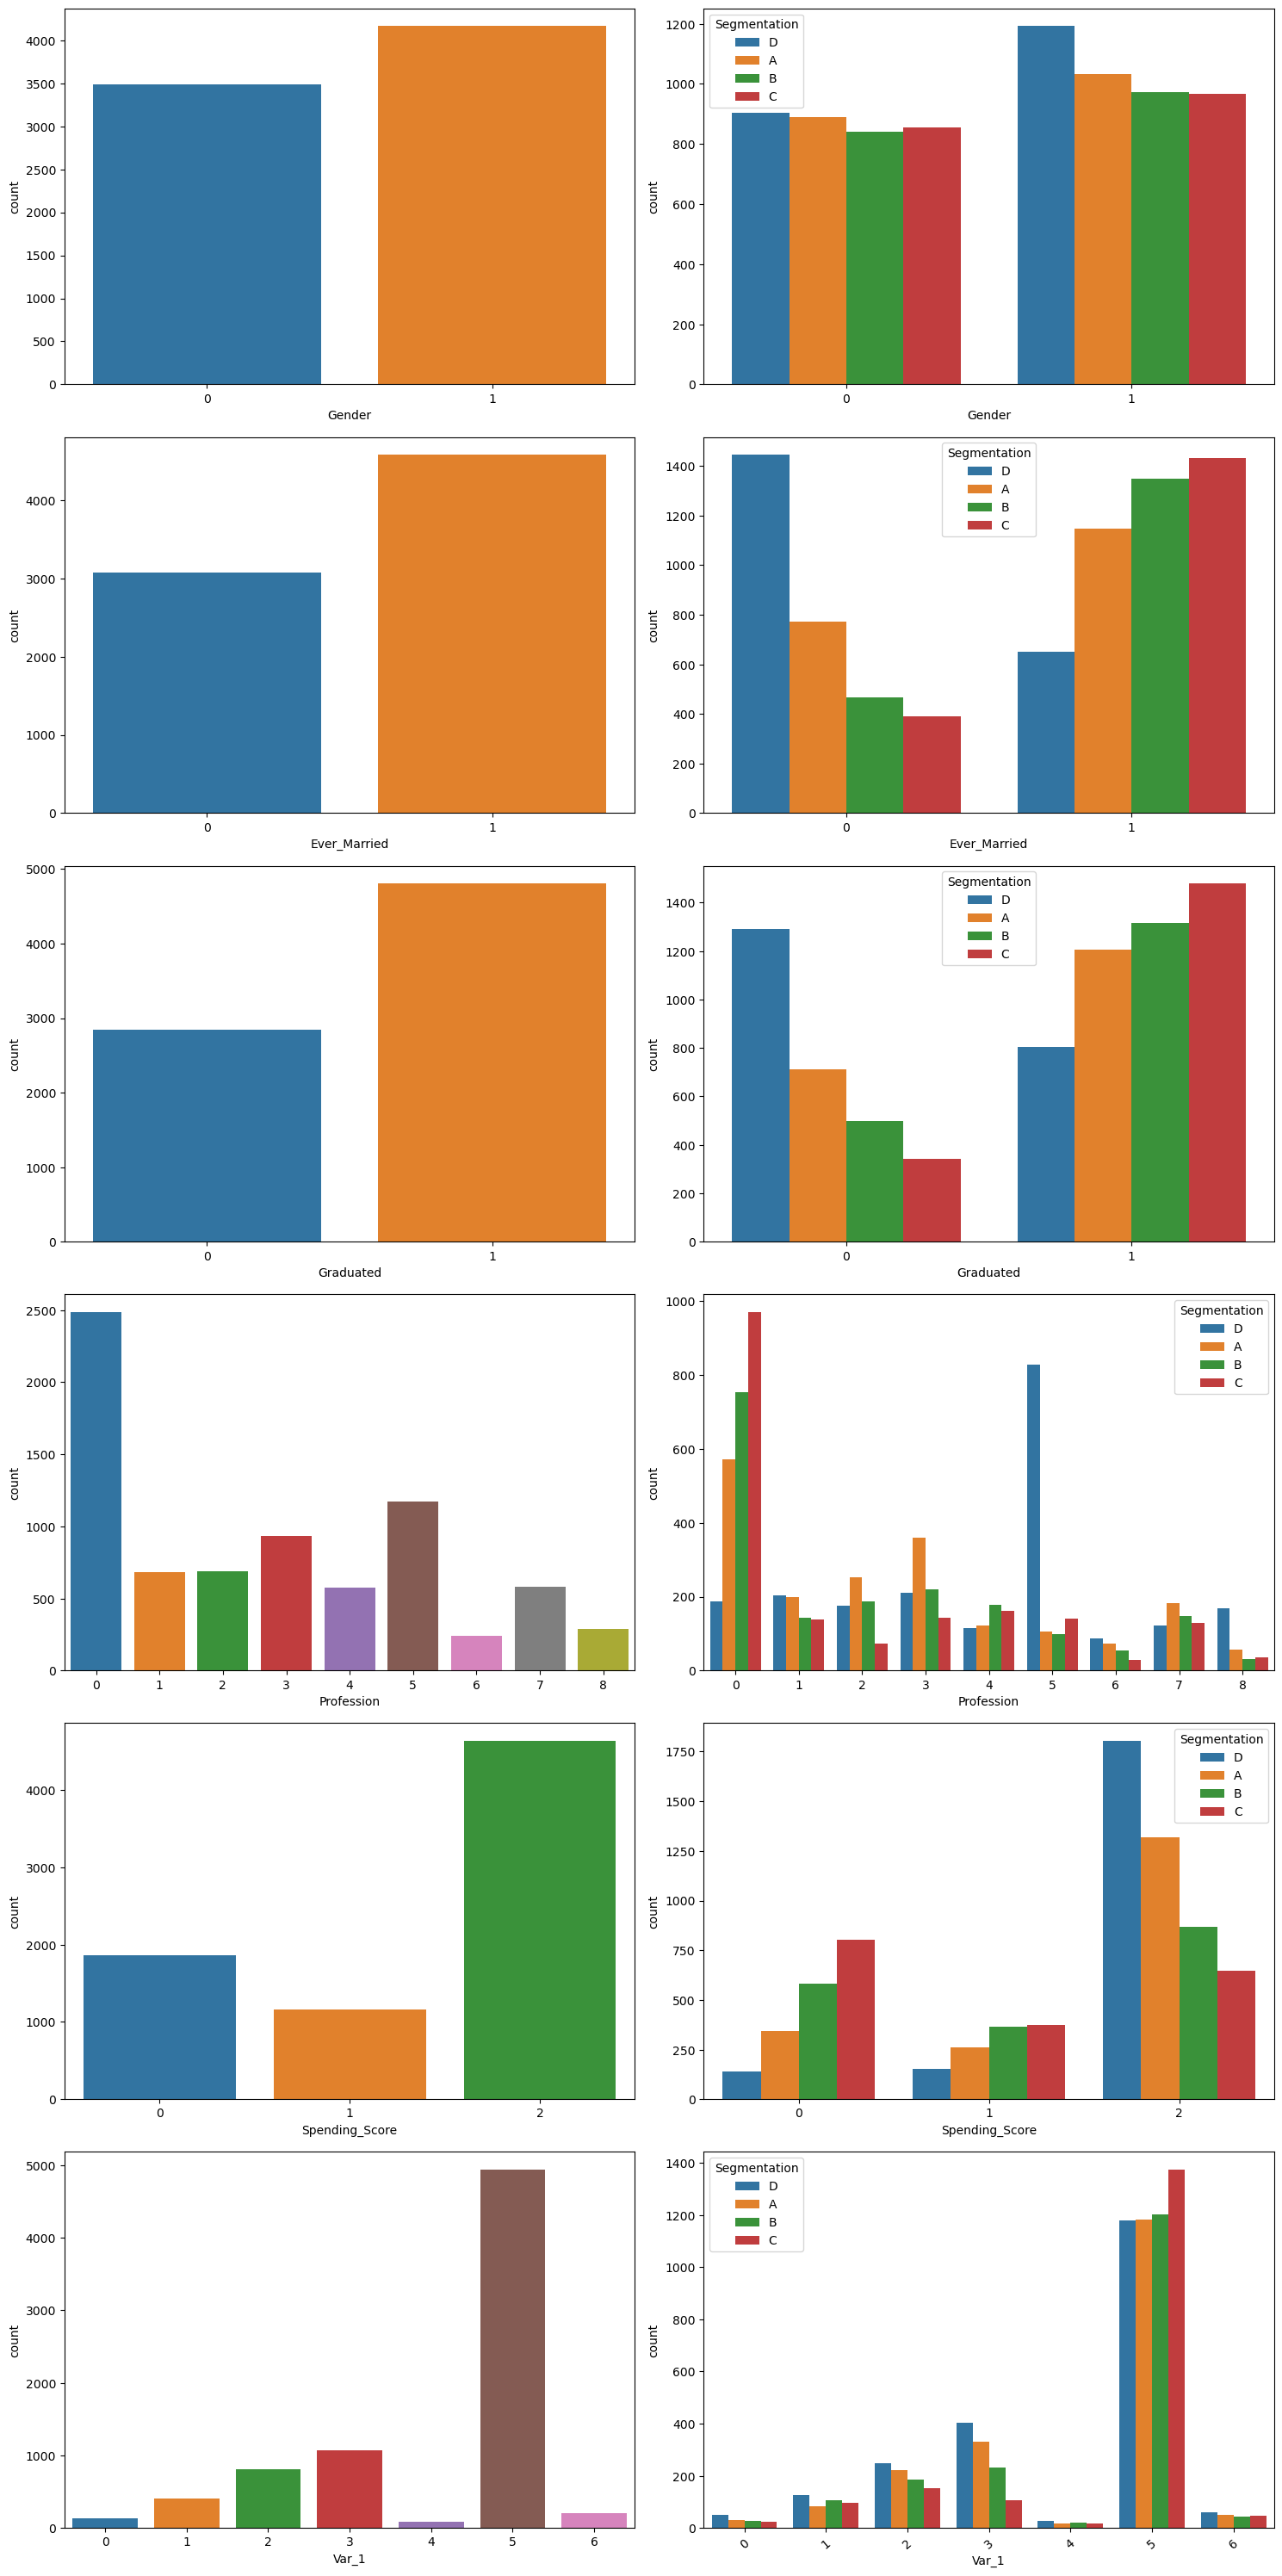

In [22]:
columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

fig, axs = plt.subplots(len(columns), 2, figsize=(15,30))

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_train, ax=axs[i, 0])
    sns.countplot(x=col, hue='Segmentation', data=df_train, ax=axs[i, 1])

plt.tight_layout()
plt.xticks(rotation=40)
plt.show()

<Axes: >

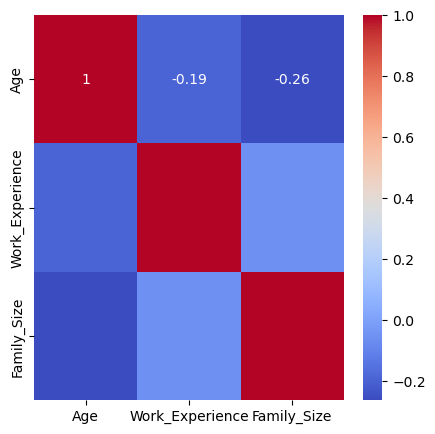

In [23]:
columns = ['Age', 'Work_Experience', 'Family_Size']

# Compute the correlation matrix for the selected columns
corr = df_train[columns].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm")


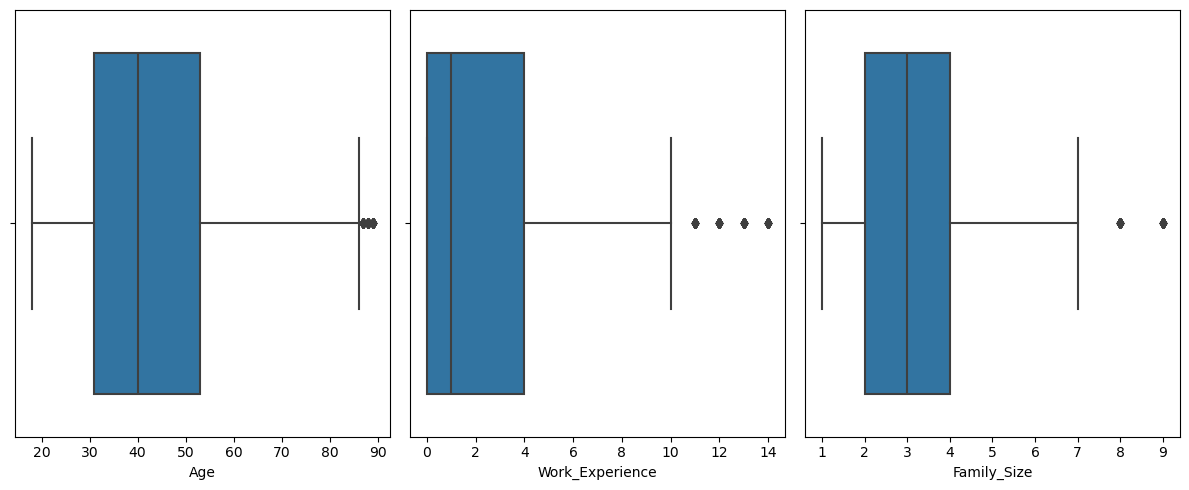

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df_train['Age'])

plt.subplot(1, 3, 2)
sns.boxplot(x=df_train['Work_Experience'])



plt.subplot(1, 3, 3)
sns.boxplot(x=df_train['Family_Size'])


plt.tight_layout()
plt.show()

<Axes: xlabel='Ever_Married', ylabel='Age'>

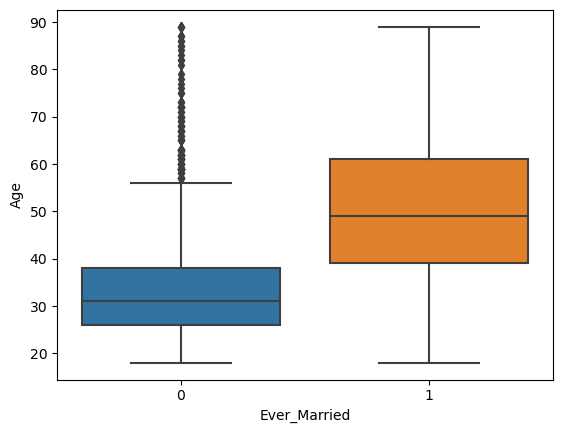

In [25]:
sns.boxplot(df_train,x = 'Ever_Married',y = 'Age')

<Axes: xlabel='Graduated', ylabel='Age'>

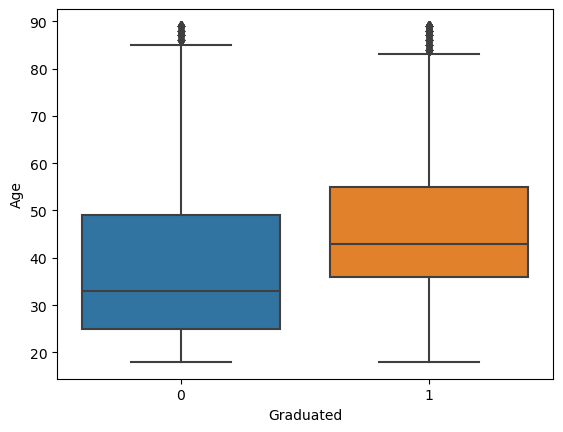

In [26]:
sns.boxplot(df_train,x = 'Graduated',y = 'Age')

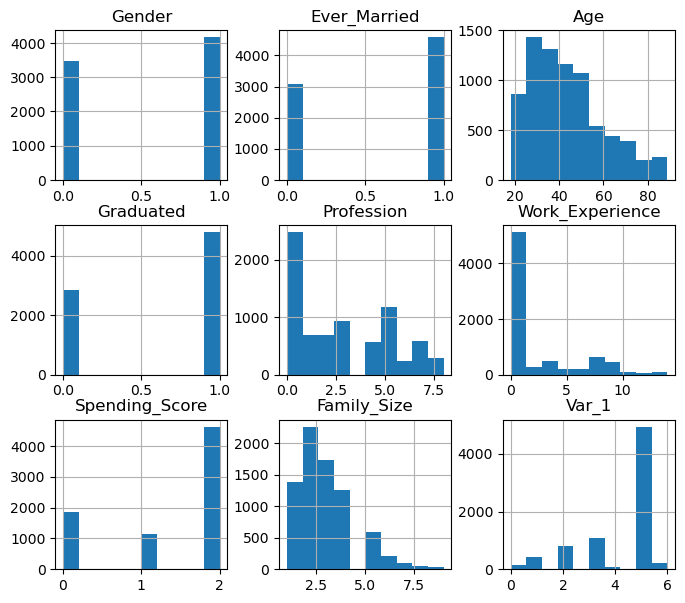

In [27]:
df_train_hist=df_train
df_train_hist= df_train.hist(figsize=(8,7))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [29]:
# Drop the 'Segmentation' column (or whatever your target column is) from the feature set
X = df_train.drop('Segmentation', axis=1)  # Features: All columns except the target
y = df_train['Segmentation']               # Target: The 'Segmentation' column

In [30]:
#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting Model

In [31]:
#Initialize Gradient Boosting model
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Train the model on training data
gbc_model.fit(X_train, y_train)

#Make predictions on validation set
y_pred_gbc = gbc_model.predict(X_val)

#calculate accuracy of Gradient Boosting model
gbc_accuracy = accuracy_score(y_val, y_pred_gbc)

#Print classification report 
print("Gradient Boosting Classification Report:")
print(classification_report(y_val, y_pred_gbc))
print(f"Gradient Boosting Overall Accuracy: {gbc_accuracy:.4f}")

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           A       0.45      0.49      0.47       381
           B       0.39      0.35      0.37       371
           C       0.56      0.48      0.52       370
           D       0.62      0.72      0.67       409

    accuracy                           0.51      1531
   macro avg       0.51      0.51      0.50      1531
weighted avg       0.51      0.51      0.51      1531

Gradient Boosting Overall Accuracy: 0.5121


K Nearest Neighbors (KNN) Model

In [32]:
#Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

#Train the model for training data
knn_model.fit(X_train, y_train)

#Make predictions on the validation set
y_pred_knn = knn_model.predict(X_val)

# Calculate the accuracy of the KNN model
knn_accuracy = accuracy_score(y_val, y_pred_knn)

#Print classification report
print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))
print(f"KNN Overall Accuracy: {knn_accuracy:.4f}")

KNN Classification Report:
              precision    recall  f1-score   support

           A       0.35      0.43      0.38       381
           B       0.34      0.33      0.33       371
           C       0.44      0.38      0.41       370
           D       0.62      0.57      0.59       409

    accuracy                           0.43      1531
   macro avg       0.44      0.43      0.43      1531
weighted avg       0.44      0.43      0.43      1531

KNN Overall Accuracy: 0.4317


In [33]:
# Initialize and Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_val)

# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))

# Calculate and print the overall accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Overall Accuracy: {rf_accuracy:.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           A       0.38      0.41      0.39       381
           B       0.35      0.34      0.35       371
           C       0.47      0.40      0.43       370
           D       0.58      0.62      0.60       409

    accuracy                           0.45      1531
   macro avg       0.44      0.44      0.44      1531
weighted avg       0.45      0.45      0.45      1531

Random Forest Overall Accuracy: 0.4481


In [34]:
# Initialize and Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = lr_model.predict(X_val)

# Print classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_val, y_pred_lr))

# Calculate and print the overall accuracy of the Logistic Regression model
lr_accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Overall Accuracy: {lr_accuracy:.4f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           A       0.39      0.44      0.41       381
           B       0.35      0.16      0.22       371
           C       0.46      0.53      0.49       370
           D       0.59      0.72      0.65       409

    accuracy                           0.47      1531
   macro avg       0.45      0.46      0.44      1531
weighted avg       0.45      0.47      0.45      1531

Logistic Regression Overall Accuracy: 0.4690


Accurcay Comparison Chart

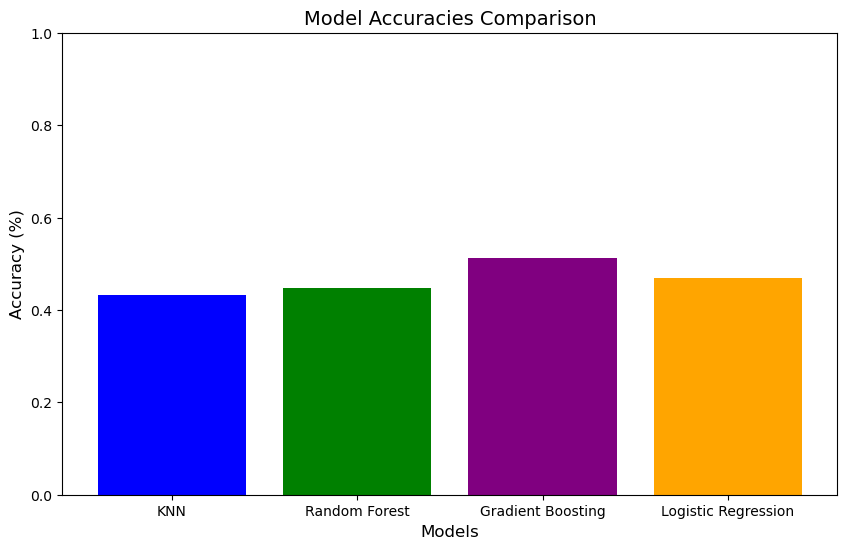

In [35]:
# Define models and their respective accuracies
models = ['KNN', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [knn_accuracy, rf_accuracy, gbc_accuracy, lr_accuracy]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple', 'orange'])

# Add titles and labels
plt.title('Model Accuracies Comparison', fontsize=14)
plt.ylim(0.0, 1.0)  # Adjusted to allow full range of accuracy
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Display the chart
plt.show()


In [36]:
df_test = pd.read_csv('test.csv')

In [37]:
#Load and explore data
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB
None


In [38]:
df_test.shape

(2627, 11)

In [39]:
df_test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [40]:
# check if dataframe has null values:
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [41]:
df_test.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [42]:
#percentage of missing values
missingvaluepercent= (df_test.isnull().sum() / len(df_test)) * 100
missingvaluepercent

ID                  0.000000
Gender              0.000000
Ever_Married        1.903312
Age                 0.000000
Graduated           0.913590
Profession          1.446517
Work_Experience    10.239817
Spending_Score      0.000000
Family_Size         4.301485
Var_1               1.218120
Segmentation        0.000000
dtype: float64

In [43]:
# Check the number of duplicate values
df_test.duplicated().sum()

0

In [44]:
#handling missing values with mode for categorical feature
df_test['Ever_Married'].fillna(df_test['Ever_Married'].mode()[0], inplace=True)
df_test['Graduated'].fillna(df_test['Graduated'].mode()[0], inplace=True)
df_test['Profession'].fillna(df_test['Profession'].mode()[0], inplace=True)
df_test['Var_1'].fillna(df_test['Var_1'].mode()[0], inplace=True)

In [45]:
#handling missing values with median for for numerical variables
df_test['Work_Experience'].fillna(df_test['Work_Experience'].median(), inplace = True)
df_test['Family_Size'].fillna(df_test['Family_Size'].median(),inplace = True)

In [46]:
# check if dataframe has null values:
df_test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Data Processing

In [47]:
#changing categorical data into numeric data
def change_gender(gender):
    if gender == 'Male':
        return 1 
    else:
        return 0
df_test['Gender'] = df_test['Gender'].apply(change_gender)

In [48]:
#dropping id as it's irrelevant to my task.
df_test.drop("ID", axis=1,inplace=True)
df_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,1,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,0,Yes,69,No,Artist,0.0,Low,1.0,Cat_6,A
3,1,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,0,No,19,No,Marketing,1.0,Low,4.0,Cat_6,A


In [49]:
#changing 'Ever_Married' and 'Graduated' into numeric data
categorical_features = ['Ever_Married', 'Graduated']  
for i in categorical_features[0:2]:
    df_test[i] = df_test[i].apply(lambda x: 1 if x=='Yes' else 0)
df_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,Engineer,0.0,Low,1.0,Cat_6,B
1,1,1,37,1,Healthcare,8.0,Average,4.0,Cat_6,A
2,0,1,69,0,Artist,0.0,Low,1.0,Cat_6,A
3,1,1,59,0,Executive,11.0,High,2.0,Cat_6,B
4,0,0,19,0,Marketing,1.0,Low,4.0,Cat_6,A


In [50]:
# Label encoder on Profession feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_test['Profession'])
df_test['Profession'] = y
df_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,Low,1.0,Cat_6,B
1,1,1,37,1,5,8.0,Average,4.0,Cat_6,A
2,0,1,69,0,0,0.0,Low,1.0,Cat_6,A
3,1,1,59,0,4,11.0,High,2.0,Cat_6,B
4,0,0,19,0,8,1.0,Low,4.0,Cat_6,A


In [51]:
# label encoder for spending score and Var_1
categorical_features = ['Spending_Score','Var_1']
for i in categorical_features:
    le = LabelEncoder()
    y = le.fit_transform(df_test[i])
    df_test[i] = y
df_test.head(8)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,2,1.0,5,B
1,1,1,37,1,5,8.0,0,4.0,5,A
2,0,1,69,0,0,0.0,2,1.0,5,A
3,1,1,59,0,4,11.0,1,2.0,5,B
4,0,0,19,0,8,1.0,2,4.0,5,A
5,1,1,47,1,1,0.0,1,5.0,3,C
6,1,1,61,1,1,5.0,2,3.0,5,D
7,0,1,47,1,0,1.0,0,3.0,5,D


In [52]:
df_test = df_test.drop('Segmentation', axis=1)

In [53]:
df_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,0,1,69,0,0,0.0,2,1.0,5
3,1,1,59,0,4,11.0,1,2.0,5
4,0,0,19,0,8,1.0,2,4.0,5


In [54]:
# Make predictions on the test data using Gradient Boosting model as it produced highest accuracy
y_pred_test = gbc_model.predict(df_test)  # Use your preprocessed test data

In [55]:
#Add predictions to the test dataframe
df_test['Predicted_Segmentation'] = y_pred_test

# Save only the predictions if 'ID' does not exist
df_test[['Predicted_Segmentation']].to_csv('test_predictions_logistic_regression.csv', index=False)

# Display the first few rows of predictions
df_test[['Predicted_Segmentation']].head(8)

,Predicted_Segmentation
0,A
1,B
2,B
3,C
4,D
5,B
6,A
7,C


In [57]:
# Check the distribution of predicted classes
df_test['Predicted_Segmentation'].value_counts()

Predicted_Segmentation
D    832
A    712
C    569
B    514
Name: count, dtype: int64